In [37]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [38]:
def make_system(elk_0 ,wolves_0, α, β, δ, γ):
    """Make a system object for the Lotka-Volterra model.
    
    α: Elk birth rate
    β: Elk death rate
    δ: Wolf birth rate
    γ: Wolf death rate
    
    returns: System object
    """
    init = State(elk=elk_0, wolves=wolves_0)

    t0 = 0
    t_end = 200

    return System(init=init, t0=t0, t_end=t_end,
                  α=α, β=β, δ=δ, γ=γ)

In [39]:
def update_func(state, t, system):
    """Update the SIR model.
    
    state: State (elk, wolves)
    t: time
    system: System object
    
    returns: State (x,y)
    """
    unpack(system)
    elk, wolves = state

    elk_births = α*elk
    elk_deaths = β*elk*wolves
    wolf_births = δ*elk*wolves
    wolf_deaths = γ*wolves
    
    elk += elk_births - elk_deaths
    wolves += wolf_births - wolf_deaths
    
    return State(elk=elk, wolves=wolves)

In [40]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for t in linrange(t0, t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    
    return frame

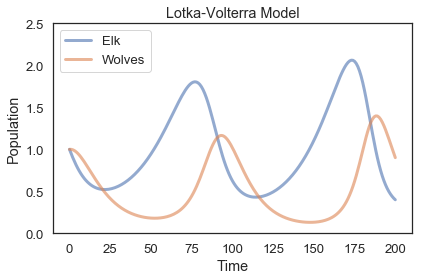

In [41]:
system = make_system(1, 1, 0.05, 0.1, 0.1, 0.1)
results = run_simulation(system, update_func)
plot(results.elk, label = "Elk")
plot(results.wolves, label = "Wolves")
decorate(ybound = (0,2.5),
        ylabel = "Population",
        xlabel = "Time",
        title = "Lotka-Volterra Model",
        loc = "upper left")

In [42]:
def slope_func(state,t,system):
    """Update the SIR model.
    
    state: State (elk, wolves)
    t: time
    system: System object
    
    returns: State (elk,wolves)
    """
    unpack(system)
    elk, wolves = state

    delkdt = α*elk   - β*elk*wolves
    dwolvesdt = δ*elk*wolves - γ*wolves
    
    
    return delkdt,dwolvesdt

In [48]:
system = make_system(1, 10, 0.1, 0.05, 0.1, 0.05)
%time results2, details = run_ode_solver(system, slope_func, t_eval=results.index);

Wall time: 31.3 ms


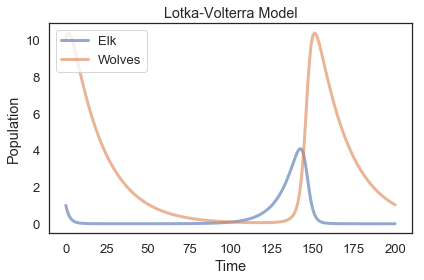

In [49]:
plot(results2.elk, label = "Elk")
plot(results2.wolves, label = "Wolves")
decorate(#ybound = (0,2.5),
        ylabel = "Population",
        xlabel = "Time",
        title = "Lotka-Volterra Model",
        loc = "upper left")